# Intro

Tried to start with a raw data file, and obtain Ozone from that. 

Failed, because (1) don't have raw data files; (2) have `.dat` files, but they are obtained by code different from `data.py`. 

As example, consider folder `/manualReadings`. The `.dat`-files there have format different from the one enforced by `data.py`. 

Asked that on email. Can proceed under the assumption that the different wavelength columns are simply linear and polynomial interpolation. 


The plan was:
1. start with raw data file of `103` Dobson spectrophotometer (the one in Cambridige), 
2. obtain the `ds` ozone
3. obtain `um` ozone
4. obtain `um` ozone independently

In [43]:
import matplotlib.pyplot as plt
import numpy as onp
import pandas as pd
from datetime import datetime as dt
import numpy as np


import autodobson

In [159]:
d = autodobson.Data(datafile = 'D20181004.103')

In [160]:
d.save()

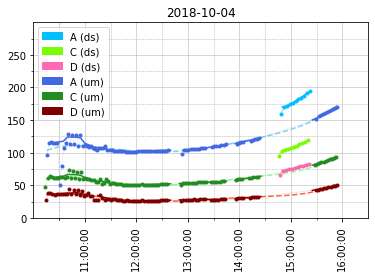

In [12]:
p = autodobson.DataPlot(data = d)

In [10]:
s = autodobson.Station(station = 'cambridge')

In [15]:
d.dobson()

'103F'

In [13]:
o = autodobson.Ozone(data = d, station = s)

Somehow, 'ds' did not get computed

In [16]:
o.ozone['ds']

{'AD': {'x': [], 'y': [], 'mu': [], 'zen': []},
 'CD': {'x': [], 'y': [], 'mu': [], 'zen': []}}

## Manually reproduce 'um'-ozone

In [21]:
o.ozone['um']['CD']['mu']

[4.676864197361177,
 4.573318251413035,
 4.478464386765348,
 4.391612928483727,
 4.312154720169195,
 4.239551499168852,
 4.173327564152399,
 4.113062578050243,
 4.058385362076373,
 4.008968551793872,
 3.9247988412399546,
 3.8895720941092082,
 3.8586517949198718,
 3.831872536101282,
 3.8090933973665706,
 3.7901962136632603,
 3.7750841463558156,
 3.763680528748277,
 3.755927962850521,
 3.7517876494882683,
 3.751238938581893,
 3.7542790908026853,
 3.7609232459624478,
 3.771204597521943,
 3.785174776612983,
 3.802904453069795,
 3.824484165264774,
 3.850025395148817,
 3.9518774285651124,
 3.9948517869012212,
 4.042717214867809,
 4.095750633469444,
 4.154266904643072,
 4.218623216519871,
 4.289224185513967,
 4.366527783836153,
 4.451052216592116,
 4.5433838881609265,
 4.644186611319669,
 4.874312757641364,
 5.005454349793299,
 5.14873290121285,
 5.3053915371656455,
 5.476839582510446,
 5.664672452478357,
 5.870691193821229]

In [23]:
# 3 wavelengths
o.data.data['um_interp']

{'A': {'x': [37200,
   37500,
   37800,
   38100,
   38400,
   38700,
   39000,
   39300,
   39600,
   39900,
   40200,
   40500,
   40800,
   41100,
   41400,
   41700,
   42000,
   42300,
   42600,
   42900,
   43200,
   43500,
   43800,
   44100,
   44400,
   44700,
   45000,
   45300,
   45600,
   45900,
   46200,
   46500,
   46800,
   47100,
   47400,
   47700,
   48000,
   48300,
   48600,
   48900,
   49200,
   49500,
   49800,
   50100,
   50400,
   50700,
   51000,
   51300,
   51600,
   51900,
   52200,
   52500,
   52800,
   53100,
   53400,
   53700,
   54000,
   54300,
   54600,
   54900,
   55200,
   55500,
   55800,
   56100,
   56400,
   56700,
   57000],
  'y': [114.97659607875332,
   115.37800316375363,
   116.70731271605976,
   117.69145746447572,
   124.19700166993844,
   123.98273994382618,
   123.88099579095376,
   122.91379273894192,
   114.5109383898625,
   111.92586926112543,
   109.12961590442951,
   107.34223302691858,
   107.11516782823219,
   105.910612148

In [25]:
o.data.data['um_interp'].keys()

dict_keys(['A', 'C', 'D'])

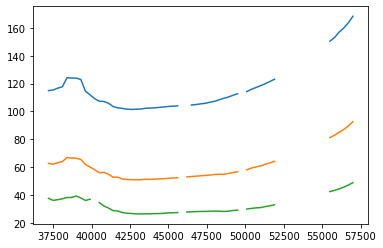

In [27]:
plt.plot(o.data.data['um_interp']['A']['x'], o.data.data['um_interp']['A']['y'],)

plt.plot(o.data.data['um_interp']['C']['x'], o.data.data['um_interp']['C']['y'],)

plt.plot(o.data.data['um_interp']['D']['x'], o.data.data['um_interp']['D']['y'],)

Example computation

In [37]:
o.data.tz, o.ap_timeformat

(Auto Dobson Timezone: UTC+0, '%Y-%m-%d %H:%M:%S')

In [68]:
# o.calibration.instrument_constants
o.calibration.annual_constants

{'lat': 52.2,
 'lon': 0.0,
 'dobson': '103',
 'LoA': -0.021,
 'LoC': -0.053,
 'LoD': -0.06,
 'GQP_C': -0.03,
 'GQP_D': -0.03,
 'GQP_Cp': 0.0,
 'NiSO4_C': 0.38,
 'NiSO4_D': 0.68,
 'NiSO4_Cp': 0.0,
 'RPN': 0.505,
 'CpZB': 0.0,
 'CDDS_offset': 30.0,
 'ADZ_offset': 40.0,
 'CDZ_offset': 10.0,
 'CZ_offset': 15.0,
 'CDZ_Hmu_offset': 0.0,
 'year': 2017,
 'month': 8,
 'day': 31,
 'hour': 0,
 'minute': 0}

In [63]:
i = 1
w = 'A'
rn = 'R-N_A'
lo = 'LoA'

In [40]:
od = o.data.data['um_interp']
t  = od[w]['x'][i]
t

37500

In [36]:
T  = dt.strftime(dt.fromtimestamp(t, tz = o.data.tz), o.ap_timeformat)
T

'1970-01-01 10:25:00'

In [47]:
# angle
angle = od[w]['y'][i]
angle

115.37800316375363

In [58]:
inc = int(np.floor(angle / 10))
inc

11

In [60]:
int(angle)//10

11

In [55]:
c = o.calibration

In [66]:
N0 = (c.instrument_constants[rn][inc] +\
 (angle / 10 - inc) *\
 (c.instrument_constants[rn][inc + 1] -\
  c.instrument_constants[rn][inc]))
N0

1.01315803480129

In [69]:
N1 = N0+c.annual_constants[lo]
N1

0.9921580348012901

# For all `ds` timesteps and wavelengths

In [91]:
o.data.data.keys()

dict_keys(['dh', 'inst', 'log', 'acq', 'ds', 'ds_values', 'ds_fit', 'ds_poly', 'ds_interp', 'um', 'um_values', 'um_fit', 'um_poly', 'um_interp'])

In [94]:
o.data.data['ds_interp']

{'A': {'x': [53400, 53700, 54000, 54300, 54600, 54900, 55200],
  'y': [170.3389841898071,
   171.42437534166424,
   174.89841766943243,
   178.82440023094108,
   182.8273499117739,
   187.18272348549755,
   192.8392292878449]},
 'C': {'x': [53400, 53700, 54000, 54300, 54600, 54900, 55200],
  'y': [103.35137431657148,
   105.46575181663495,
   107.63308821418644,
   110.17923056360357,
   112.7868073678276,
   115.31313242588121,
   119.01661495828182]},
 'D': {'x': [53400, 53700, 54000, 54300, 54600, 54900, 55200],
  'y': [72.7772072166548,
   73.77763497763982,
   75.15460571174667,
   77.0113688302821,
   79.02569618951614,
   80.47312916120973,
   82.82956015783063]}}

In [98]:
# number of measurements (each measurement is timestep + wavelength)
Npts = len(o.data.data['ds_interp']['A']['x'])

c = o.calibration

In [125]:
from astropy.time import Time
from astropy.coordinates import EarthLocation, get_sun, AltAz
import astropy.units as u


In [126]:
o.station.

BAS Cambridge Auto Dobson station. Lat: 52.21, Lon: 0.08, Elevation: 6, Ozone Height: 20779.0

In [153]:
o.station

BAS Cambridge Auto Dobson station. Lat: 52.21, Lon: 0.08, Elevation: 6, Ozone Height: 20779.0

Auto Dobson Calibration for Dobson: 103F

In [157]:
def get_zenith(station, time):

        """
        Use astropy to obtain sun zenith angle at time, and station location
        """

        t = Time(time)
        l = EarthLocation(lat = station.lat * u.deg, 
                          lon = station.lon * u.deg, height = station.elevation * u.m)
        s = get_sun(t)
        s = s.transform_to(AltAz(obstime = t, location = l))
        z = s.zen.radian
        return z
    
    
def get_mu(station, zenith):

        """
        Calculate mu value, using station and sun information.
        """

        R   = station.radius
        r   = station.elevation
        h   = station.ozone_height
        SZA = zenith
        mu = (R + h) / np.sqrt(np.square(R + h) 
                               - np.square(R + r) * np.square(np.sin(SZA)))
        return mu

In [130]:
get_zenith(o.station, T)

1.3654214942822096

In [ ]:
# CAN I USE PUBLISHED DATA? 

# The following is done for every timestep (a regular time-mesh, produced by data-class)
# 1. angle is computed from wavelength value (interpolated A, C, D to regular mesh)
# 2. angle is rounded to get inc
# 3. inc should be within [0, 29] interval
# 4. inc is combined with instrument_constants and annual_constants from calibration-object
# to produce N0, N1
#     Note: calibration is an instance of class Calibration(ID), 
#           where ID is Dobson ID, e.g. 103F
# 5. z (zenith angle) and mu (path length) are computed from calibration-object
# 6. 'ds'-computation is carried out if 
#     mu<2.7 using N0, N1 for A and D waves
#     mu<4. using N0, N1 for C and D waves
# 7. 'um'-computation is carried out using if-statements to select appropriate polynomial

In [149]:
o.data.dobson()

'103F'

In [150]:
t  = od['A']['x'][i]
t

55200

In [152]:
T  = dt.strftime(dt.fromtimestamp(t, tz = o.data.tz), o.ap_timeformat)
T

'1970-01-01 15:20:00'

In [161]:
od

{'A': {'x': [53400, 53700, 54000, 54300, 54600, 54900, 55200],
  'y': [170.3389841898071,
   171.42437534166424,
   174.89841766943243,
   178.82440023094108,
   182.8273499117739,
   187.18272348549755,
   192.8392292878449]},
 'C': {'x': [53400, 53700, 54000, 54300, 54600, 54900, 55200],
  'y': [103.35137431657148,
   105.46575181663495,
   107.63308821418644,
   110.17923056360357,
   112.7868073678276,
   115.31313242588121,
   119.01661495828182]},
 'D': {'x': [53400, 53700, 54000, 54300, 54600, 54900, 55200],
  'y': [72.7772072166548,
   73.77763497763982,
   75.15460571174667,
   77.0113688302821,
   79.02569618951614,
   80.47312916120973,
   82.82956015783063]}}

In [162]:

od = o.data.data['ds_interp']

for i in range(Npts):
    d = {}
    
    t  = od['A']['x'][i] # time on temporal mesh
    T  = dt.strftime(dt.fromtimestamp(t, tz = o.data.tz), o.ap_timeformat)
    
    for w in ['A', 'C', 'D']:
        
        try:
            d[w] = {}
            d[w]['angle'] = od[w]['y'][i]
            d[w]['inc']   = int(np.floor(od[w]['y'][i] / 10))
            rn            = ''.join(['R-N_', w])
            lo            = ''.join(['Lo', w])
            
            # if the 'inc' is outside of this range, give up:
            if (d[w]['inc'] < 0 or
                d[w]['inc'] > 29):
                d[w]['N0'] = None
                d[w]['N1'] = None
            else:
                # 'N' values calculated from dial readings and calibration
                # constants:
                d[w]['N0'] = (c.instrument_constants[rn][d[w]['inc']] +
                             (d[w]['angle'] / 10 - d[w]['inc']) *
                             (c.instrument_constants[rn][d[w]['inc'] + 1] -
                              c.instrument_constants[rn][d[w]['inc']]))
                d[w]['N1'] = d[w]['N0'] + c.annual_constants[lo]
        except:
            
             d[w]['N0'] = None
             d[w]['N1'] = None
             print(fail)
        
        print(d[w]['angle'], d[w]['N0'])
        
        
    if ((d['A']['N1'] is not None) and 
          (d['C']['N1'] is not None) and 
          (d['D']['N1'] is not None)):
        
        z  = get_zenith(o.station, T)
        mu = get_mu(o.station, z)
        print(T, z, mu)
        
        
        

170.3389841898071 1.6431356071156464
103.35137431657148 0.9161948426189721
72.7772072166548 0.6104943514448825
1970-01-01 14:50:00 1.4583002864638939 7.252249190756343
171.42437534166424 1.6563773791683039
105.46575181663495 0.9390301196196575
73.77763497763982 0.6203985862786342
1970-01-01 14:55:00 1.4666260563936553 7.617186794447713
174.89841766943243 1.6987606955670755
107.63308821418644 0.9624373527132135
75.15460571174667 0.634030596546292
1970-01-01 15:00:00 1.4751419052591526 8.017825509806425
178.82440023094108 1.7466576828174811
110.17923056360357 0.9899715361996392
77.0113688302821 0.6524125514197928
1970-01-01 15:05:00 1.4838439173279738 8.455877017791714
182.8273499117739 1.7957764039148187
112.7868073678276 1.0186548810461036
79.02569618951614 0.6723543922762099
1970-01-01 15:10:00 1.4927281711682776 8.931524499823047
187.18272348549755 1.8493474988716196
115.31313242588121 1.0464444566846933
80.47312916120973 0.6870151691088231
1970-01-01 15:15:00 1.5017907438146845 9.44

In [132]:
None+12

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [114]:
d.keys()

dict_keys(['A'])

In [121]:
d['D']['N1']

0.6519933376730047

In [110]:
d

{'A': {'angle': 192.8392292878449,
  'inc': 19,
  'N0': 1.9186385973117075,
  'N1': 1.8976385973117076},
 'C': {'angle': 119.01661495828182,
  'inc': 11,
  'N0': 1.0871827645411,
  'N1': 1.0341827645411001},
 'D': {'angle': 82.82956015783063,
  'inc': 8,
  'N0': 0.7119933376730047,
  'N1': 0.6519933376730047}}